# <center>ĐỒ ÁN CUỐI KÌ: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</center>

| MSSV     | Họ và tên       | Github    |
|----------|-----------------|-----------|
| 1712575  | Hoàng Xuân Long | dralong10 |
| 19120539 | Vương Thế Khang | vt-khang  |

## Import

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## A. THU THẬP DỮ LIỆU

Bộ dữ liệu mà nhóm chọn là bộ dữ liệu về các bộ phim hay TV shows được thu thập từ nền tảng phát video và truyền thông phổ biến nhất **Netflix**. \
Theo như mô tả về bộ dữ liệu:
> This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. \
> Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Có vẻ như bộ dữ liệu này thu thập các bộ phim và TV shows từ giữa năm 2021 trở về trước và lần cập nhật gần đây nhất của bộ dữ liệu là **27/09/2021 (Version 5)** nên ta có thể tin tưởng về độ chính xác của bộ dữ liệu và các kết quả thống kê. Ngoài ra bộ dữ liệu trên được thu thập từ Flixable - công cụ tìm kiếm bên thứ ba của Netflix.

Các file dữ liệu này bao gồm:
- File "netflix_titles.csv": bộ dữ liệu được thu thập từ [Kaggle](https://www.kaggle.com/shivamb/netflix-shows)
- File "description.txt": mô tả ý nghĩa của các cột (file tự tạo theo mô tả các cột thuộc tính của bộ dữ liệu)

Người thu thập dữ liệu: Shivam Bansai [@shivamb](https://www.kaggle.com/shivamb) \
License: [**CC0 1.0 Universal (CC0 1.0) Public Domain Dedication**](https://creativecommons.org/publicdomain/zero/1.0/)
>The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

Đầu tiên, ta sẽ xem thử bộ dữ liệu trông như thế nào nhé. Đọc dữ liệu từ file "netflix_titles.csv" và lưu vào dataframe `netflix_df`.

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## B. KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
netflix_df.shape

(8807, 12)

Vậy dữ liệu có kích thước **8807 dòng x 11 cột**

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một bộ phim, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_row = all(netflix_df.duplicated())
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

### Mỗi cột có ý nghĩa gì?

Xem file "description.txt"

In [5]:
col_name, col_meaning = [], []
with open('description.txt', 'r') as f:
    for line in f.readlines():
        col_name.append(line.strip().split('\t')[0])
        col_meaning.append(line.strip().split('\t')[1])
description_df = pd.DataFrame({'Column': col_name,
                              'Meaning': col_meaning}).set_index('Column')
description_df

,Meaning
Column,
show_id,Unique ID for every Movie / Tv Show
type,Identifier - A Movie or TV Show
title,Title of the Movie / Tv Show
director,Director of the Movie
cast,Actors involved in the movie / show
country,Country where the movie / show was produced
data_added,Date it was added on Netflix
release_year,Actual Release year of the movie / show
rating,TV Rating of the movie / show


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Xem thử kiểu dữ liệu của các cột dữ liệu

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Như vậy có thể thấy:
- Cột "date_added" đang có kiểu dữ liệu `object`. Ta cần đưa cột này về dạng `datetime`.
- Cột "cast" và "listed_in" chứa các giá trị liệt kê, do đó ta sẽ đưa cột này về dạng `list`.

Ta sẽ làm điều này ở bước tiền xử lý dữ liệu.

---

## Tiền xử lý

Thay đổi kiểu dữ liệu của cột "date_added" sang kiểu dữ liệu dạng `datetime`.

In [7]:
netflix_df['date_added'] = netflix_df['date_added'].astype('datetime64')

Thay đổi kiểu dữ liệu của cột "cast" và "listed_in" sang kiểu dữ liệu dạng `list`. Do trong 2 cột này có các giá trị NaN, nên khi chuyển về dạng `list` sẽ bị lỗi. Do đó trước khi thay đổi kiểu dữ liệu, ta sẽ thay các giá trị NaN của 2 cột này thành "" (chuỗi rỗng).

In [8]:
netflix_df['cast'] = netflix_df['cast'].replace(np.nan, '').str.split(',')
netflix_df['listed_in'] = netflix_df['listed_in'].replace(np.nan, '').str.split(',')

Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [9]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

---

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ xếp các cột có kiểu dữ liệu `datetime` vào nhóm numerical. Như vậy, chỉ có 2 cột numeric là "date_added" và "release_year".

Với mỗi cột numerical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), giá trị nhỏ nhất (min) và giá trị lớn nhất (max). Sau đó ta sẽ lưu 3 giá trị này vào dataframe `nume_col_df` thành 3 dòng là "ratio_missing_val", "min", "max".

In [10]:
def ratio_missing_val(s):
    return s.isnull().mean()*100

nume_col_df = netflix_df[['date_added','release_year']].agg([ratio_missing_val, min, max])
nume_col_df

,date_added,release_year
ratio_missing_val,0.113546,0.0
min,2008-01-01 00:00:00,1925.0
max,2021-09-25 00:00:00,2021.0


Min và max của các cột có vẻ không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 8 cột categorical là "show_id", "type", "little", "director", "country", "rating", "duration", "description".

Với mỗi cột categorical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu 3 giá trị này vào dataframe `cate_col_df` thành 3 dòng là "ratio_missing_val", "num_diff_vals", "diff_vals".

In [11]:
def ratio_missing_val(s):
    return s.isna().mean()*100
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.dropna().unique()

cate_col_df = netflix_df[['show_id','type','title','director','country','rating','duration','description']].agg([ratio_missing_val, num_diff_vals, diff_vals])
cate_col_df

,show_id,type,title,director,country,rating,duration,description
ratio_missing_val,0.0,0.0,0.0,29.908028,9.435676,0.045418,0.034064,0.0
num_diff_vals,8807,2,8807,4528,748,17,220,8775
diff_vals,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...","[Movie, TV Show]","[Dick Johnson Is Dead, Blood & Water, Gangland...","[Kirsten Johnson, Julien Leclercq, Mike Flanag...","[United States, South Africa, India, United St...","[PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ...","[90 min, 2 Seasons, 1 Season, 91 min, 125 min,...","[As her father nears the end of his life, film..."


Hầu hết các cột dạng phân loại không có gì bất thường. Ngoại trừ cột "director" có tỉ lệ % giá trị thiếu khá cao **(~29.9%)** so với các cột khác, vì thế ta sẽ tránh dùng cột này trong bước Phân tích dữ liệu để kết quả phân tích được chính xác và tin cậy hơn.

## C. ĐẶT CÂU HỎI

### Câu 1: Top 5 diễn viên hoạt động nhiều nhất qua từng năm
### Câu 2: So sánh đối tượng người xem của Netflix qua từng năm
### Câu 3: Tương quan giữa TV Show và Movie qua từng năm
### Câu 4: Thời lượng của phim trên Netflix thay đổi như thế nào qua từng năm

## D. PHÂN TÍCH DỮ LIỆU

### Câu 1: Top 5 diễn viên hoạt động nhiều nhất qua từng năm

In [202]:
def col_cast_release_year(year, top=5):
    return netflix_df[netflix_df['release_year'] == year]['cast'].explode().replace('', np.nan).dropna().value_counts()[:top].index
year = np.sort(netflix_df['release_year'].unique())
list_top5_cast = list(map(col_cast_release_year, year))
df_top5_cast = pd.DataFrame(list_top5_cast, columns = ['Top1','Top2','Top3','Top4','Top5'], index = year)
pd.options.display.max_rows = 999
df_top5_cast

,Top1,Top2,Top3,Top4,Top5
1925,None,None,None,None,None
1942,Jane Darwell,Henry Fonda,None,None,None
1943,None,None,None,None,None
1944,Burgess Meredith,None,None,None,None
1945,Dana Andrews,Walter Huston,None,None,None
1946,Walter Huston,None,None,None,None
1947,Lloyd Bridges,James Stewart,None,None,None
1954,Rosemary Clooney,Mohsen Hassanein,Vera-Ellen,Rafeaa El Shal,Menassa Fahmy
1955,Virgilio Riento,Tina Pica,Sal Mineo,Maurizio Arena,Ann Doran
1956,Warren Stevens,Faten Hamama,Ahmed Ramzy,Jack Kelly,Earl Holliman


In [213]:
pd.reset_option('display.max_rows')

### Câu 2: Xu hướng làm phim của Netflix hướng tới đối tượng nào qua từng năm

In [155]:
def col_rating_release_year(year):
    return netflix_df[netflix_df['release_year'] == year].loc[:,'rating'].value_counts()[:1].index
list_top1_rating = list(map(col_rating_release_year,year))
df_top1_rating = pd.DataFrame(list_top1_rating, columns = ['Trending'], index = year)
pd.options.display.max_columns = 999
df_top1_rating.T

,1925,1942,1943,1944,1945,1946,1947,1954,1955,1956,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Trending,TV-14,TV-14,TV-PG,TV-14,TV-MA,TV-PG,TV-PG,TV-G,TV-PG,G,G,TV-14,TV-PG,TV-14,TV-PG,TV-MA,G,PG-13,TV-PG,R,R,TV-PG,TV-MA,G,TV-MA,TV-14,TV-14,TV-14,PG,PG,PG,TV-14,R,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,PG-13,TV-PG,TV-14,TV-14,TV-MA,R,TV-14,TV-14,PG-13,R,R,R,R,PG-13,R,PG-13,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-14,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA


In [214]:
pd.reset_option('display.max_columns')

Netflix có xu hướng làm thể loại phim có nội dung thiết kế dành riêng cho người lớn, không phù hợp với trẻ em hay thiếu niên. 
Lý do: vì đây là nền tảng stream phim trực tuyến có trả phí và đa số là khách hàng ở độ tuổi trưởng thành đã có công việc làm, vây nên netflix hướng đến đối tượng đó

### Câu 3: Tương quan giữa TV Show và Movie qua từng năm

In [187]:
def col_type_release_year(year):
    return netflix_df[netflix_df['release_year'] == year]['type'].value_counts().sort_index()
list_type = list(map(col_type_release_year, year))
df_type = pd.DataFrame(list_type, index = year).replace(np.nan, 0).astype(int)
pd.options.display.max_rows = 999
df_type

,TV Show,Movie
1925,1,0
1942,0,2
1943,0,3
1944,0,3
1945,1,3
1946,1,1
1947,0,1
1954,0,2
1955,0,3
1956,0,2


In [188]:
pd.reset_option('display.max_rows')

<AxesSubplot:>

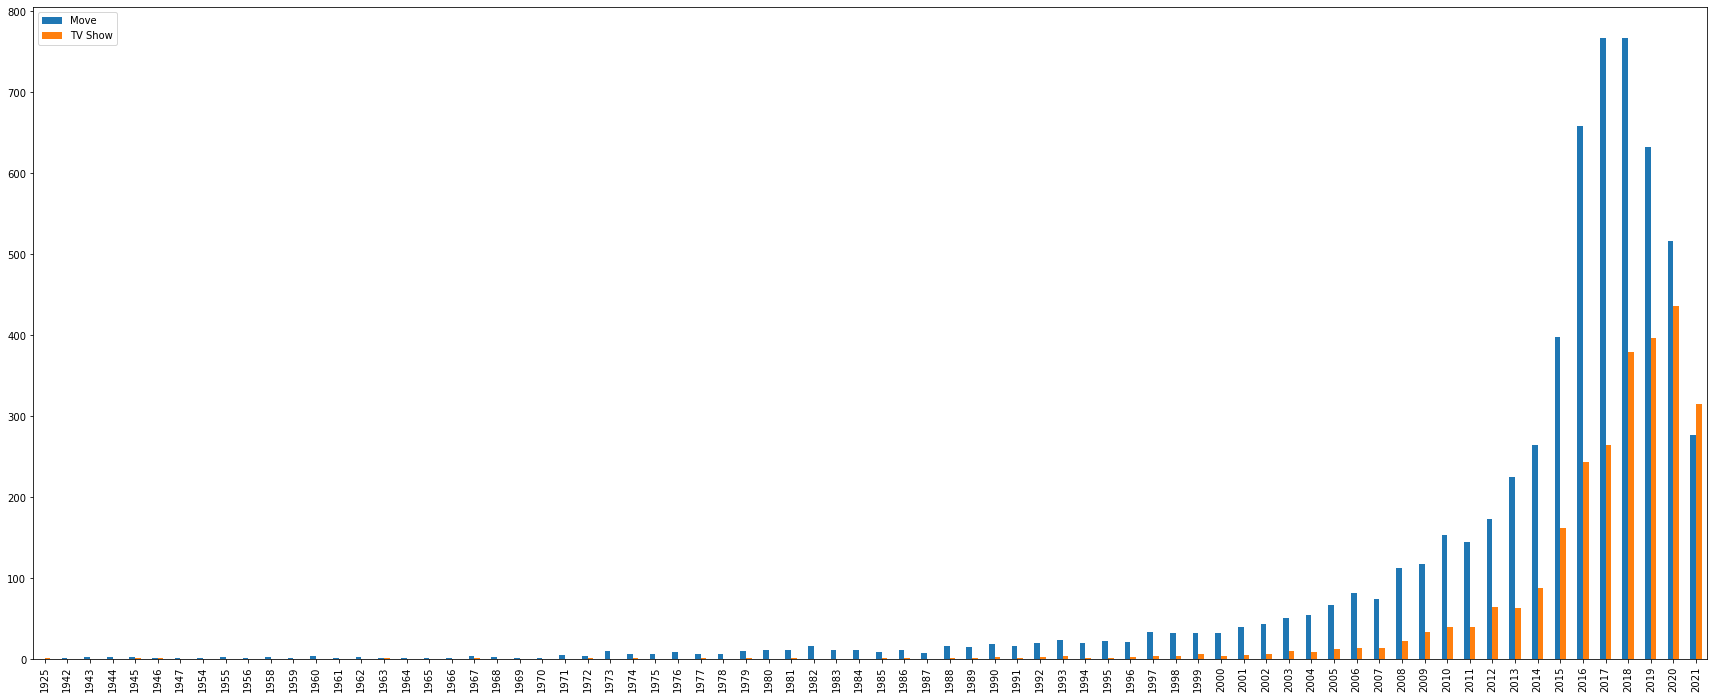

In [201]:
visual_df_type = pd.DataFrame({'Move': df_type['Movie'], 'TV Show': df_type['TV Show']})
visual_df_type.sort_index().plot.bar(figsize = (30, 12))

### Câu 4: Thời lượng của phim trên Netflix thay đổi như thế nào qua từng năm

In [232]:
def col_duration_release_year(year):
    return netflix_df[netflix_df['release_year'] == year]['duration'].value_counts().sort_index()
column = netflix_df['duration'].value_counts().sort_index().index
list_duration = list(map(col_duration_release_year, year))
df_duration = pd.DataFrame(list_duration, columns = column, index = year).replace(np.nan, 0).astype(int)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
df_duration

,1 Season,10 Seasons,10 min,100 min,101 min,102 min,103 min,104 min,105 min,106 min,107 min,108 min,109 min,11 Seasons,11 min,110 min,111 min,112 min,113 min,114 min,115 min,116 min,117 min,118 min,119 min,12 Seasons,12 min,120 min,121 min,122 min,123 min,124 min,125 min,126 min,127 min,128 min,129 min,13 Seasons,13 min,130 min,131 min,132 min,133 min,134 min,135 min,136 min,137 min,138 min,139 min,14 min,140 min,141 min,142 min,143 min,144 min,145 min,146 min,147 min,148 min,149 min,15 Seasons,15 min,150 min,151 min,152 min,153 min,154 min,155 min,156 min,157 min,158 min,159 min,16 min,160 min,161 min,162 min,163 min,164 min,165 min,166 min,167 min,168 min,169 min,17 Seasons,17 min,170 min,171 min,172 min,173 min,174 min,176 min,177 min,178 min,179 min,18 min,180 min,181 min,182 min,185 min,186 min,187 min,189 min,19 min,190 min,191 min,192 min,193 min,194 min,195 min,196 min,2 Seasons,20 min,200 min,201 min,203 min,204 min,205 min,208 min,209 min,21 min,212 min,214 min,22 min,224 min,228 min,229 min,23 min,230 min,233 min,237 min,24 min,25 min,253 min,26 min,27 min,273 min,28 min,29 min,3 Seasons,3 min,30 min,31 min,312 min,32 min,33 min,34 min,35 min,36 min,37 min,38 min,39 min,4 Seasons,40 min,41 min,42 min,43 min,44 min,45 min,46 min,47 min,48 min,49 min,5 Seasons,5 min,50 min,51 min,52 min,53 min,54 min,55 min,56 min,57 min,58 min,59 min,6 Seasons,60 min,61 min,62 min,63 min,64 min,65 min,66 min,67 min,68 min,69 min,7 Seasons,70 min,71 min,72 min,73 min,74 min,75 min,76 min,77 min,78 min,79 min,8 Seasons,8 min,80 min,81 min,82 min,83 min,84 min,85 min,86 min,87 min,88 min,89 min,9 Seasons,9 min,90 min,91 min,92 min,93 min,94 min,95 min,96 min,97 min,98 min,99 min
1925,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1945,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1946,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## E. NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN

## F. TÀI LIỆU THAM KHẢO